<a id="top"></a>
# Определение перспективного тарифа для телеком компании
<h4 align="right">Спринт 4    |    Когорта ДС13    |    Артур Урусов</h4>

>Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

>Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Содержание

0. **[Подготовка](#0)**

    0.1. [Импорт библиотек](#0-1)


1. **[Получение данных](#1)**

    1.1. [Чтение файлов](#1-1) 
    
    1.2. [Выводы по первому этапу](#1-2)


2. **[Предобработка данных](#2)**

    2.1. [Звонки](#2-1)
    
    2.2. [Интернет](#2-2)
    
    2.3. [Сообщения](#2-3)
    
    2.4. [Тарифы](#2-4)
    
    2.5. [Пользователи](#2-5)
    
    2.6. [Объединение данных](#2-6)
    
    2.7. [Выводы по второму этапу](#2-7)


3. **[Анализ данных](#3)**

    3.1. [Cреднее, дисперсия и стандартное отклонение](#3-1)
    
    3.2. [Графики распределения](#3-2)
    
    3.3. [Выводы по третьему этапу](#3-3)
    
    
4. **[Проверка гипотез](#4)**

    4.1. [«Ультра» и «Смарт»: различается ли средняя выручка?](#4-1)
    
    4.2. [Отличается ли средняя выручка пользователей из Москвы от выручки пользователей из других регионов?](#4-2)


5. **[Результаты исследования](#5)**

    5.1. [Общие выводы](#5-1)
    
    5.2. [Рекомендации](#5-2)

<a id="0"></a>
## Этап 0. Подготовка

<a id="0-1"></a>
### Шаг 0.1 Импорт библиотек

In [1]:
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
pd.set_option('display.max_columns', None)

[к началу шага](#0-1) | [к началу этапа](#0) | [к началу страницы](#top)

<a id="1"></a>
## Этап 1. Получение данных

<a id="1-1"></a>
### Шаг 1.1 Чтение файлов

Для начала откроем все датасеты и сохраним каждый из них в свою переменную:

In [2]:
try:
    if platform.system() == 'Windows':
        # прочитаем файл с данными и сохраним в df (Windows)
        calls_df = pd.read_csv('datasets\\calls.csv')
        internet_df = pd.read_csv('datasets\\internet.csv')
        messages_df = pd.read_csv('datasets\\messages.csv')
        tariffs_df = pd.read_csv('datasets\\tariffs.csv')
        users_df = pd.read_csv('datasets\\users.csv')
    else:
        # прочитаем файл с данными с сохраним в df (UNIX-like)
        calls_df = pd.read_csv('/datasets/calls.csv')
        internet_df = pd.read_csv('/datasets/internet.csv')
        messages_df = pd.read_csv('/datasets/messages.csv')
        tariffs_df = pd.read_csv('/datasets/tariffs.csv')
        users_df = pd.read_csv('/datasets/users.csv')
except:
    print('Ошибка!')

Теперь взглянем на каждый.

In [3]:
calls_df.info() # получим общую информацию о таблице
calls_df.head(10)  # выведем первые 10 строк таблицы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Начнём по порядку, с датафрейма `calls_df`. Всего 202&nbsp;607 строк (считай звонков), явных пропущенных значений нет, но есть звонки с длительностью 0.00 &mdash; с этим предстоит разобраться. В остальном, особых проблем пока не наблюдается. Стоит перевести столбец `call_date` в формат *datetime*, возможно как-то изменить формат столбца `id`.

In [4]:
internet_df.info() # получим общую информацию о таблице
internet_df.head(10)  # выведем первые 10 строк таблицы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


В датафрейме `internet_df` ситуация слегка иная. Странных нулевых значений нет, зато откуда-то взялся не совсем понятный столбец `Unnamed: 0`. Наверное, стоит передать эту информацию бэкенду. Как и в прошлом датафрейме, нам предстоит перевести `session_date` в *datetime*. В остальном, пока проблем не видно. В этом датафрейме 149&nbsp;395 строк &mdash; то есть столько было интернет сеансов.

А еще обнаружились нулевые сессии, таких почти 20 000:


In [5]:
internet_df[internet_df['mb_used']==0].shape[0]

19598

In [6]:
messages_df.info() # получим общую информацию о таблице
messages_df.head(10)  # выведем первые 10 строк таблицы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


В датафрейме `messages_df` всё выглядит вообще замечательно! Нет явно пропущенных значений, все столбцы адекватные, всё красиво. Осталось только столбец `message_date` в *datetime* перевести. Тут 123&nbsp;036 строк, что равно 123&nbsp;036 сообщениям.

In [7]:
tariffs_df.info() # получим общую информацию о таблице
tariffs_df.head(10)  # выведем первые 10 строк таблицы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В датафрейме `tariffs_df` всего две строки &mdash; именно столько тарифов в компании «Мегалайн». Проблем с этим датафреймом не видно, разве что можно поменять порядок столбцов для наглядности.

In [8]:
users_df.info() # получим общую информацию о таблице
users_df.head(10)  # выведем первые 10 строк таблицы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


В датафрейме `users_df` всего 500 строк, значит у нас есть данные на 500 клиентов. Опять же, столбец `reg_date` нужно перевести в *datetime*. Есть еще столбец `churn_date`, его тоже стоит перевести в *datetime*, но в этом столбце очень много пропущенных значений. Возможно, найдется и другое решение.

#### Описание данных

Еще раз посмотрим, какие данные нам предоставлены, взяв их описание из описания проекта:

- **Таблица `users_df` (информация о пользователях):**
    - `user_id` — уникальный идентификатор пользователя
    - `first_name` — имя пользователя
    - `last_name` — фамилия пользователя
    - `age` — возраст пользователя (годы)
    - `reg_date` — дата подключения тарифа (день, месяц, год)
    - `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    - `city` — город проживания пользователя
    - `tariff` — название тарифного плана
- **Таблица `calls_df` (информация о звонках):**
    - `id` — уникальный номер звонка
    - `call_date` — дата звонка
    - `duration` — длительность звонка в минутах
    - `user_id` — идентификатор пользователя, сделавшего звонок
- **Таблица `messages_df` (информация о сообщениях):**
    - `id` — уникальный номер сообщения
    - `message_date` — дата сообщения
    - `user_id` — идентификатор пользователя, отправившего сообщение
- **Таблица `internet_df` (информация об интернет-сессиях):**
    - `id` — уникальный номер сессии
    - `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
    - `session_date` — дата интернет-сессии
    - `user_id` — идентификатор пользователя
- **Таблица `tariffs_df` (информация о тарифах):**
    - `tariff_name` — название тарифа
    - `rub_monthly_fee` — ежемесячная абонентская плата в рублях
    - `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
    - `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
    - `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    - `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    - `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
    - `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

#### Описание тарифов

Там же возьмём описание тарифов:

- **Тариф «Смарт»**
    - Ежемесячная плата: 550 рублей
    - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    - Стоимость услуг сверх тарифного пакета:
        - минута разговора: 3 рубля
        - сообщение: 3 рубля
        - 1 Гб интернет-трафика: 200 рублей
- **Тариф «Ультра»**
    - Ежемесячная плата: 1950 рублей
    - Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    - Стоимость услуг сверх тарифного пакета:
        - минута разговора: 1 рубль
        - сообщение: 1 рубль
        - 1 Гб интернет-трафика: 150 рублей

*«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.*

[к началу шага](#1-1) | [к началу этапа](#1) | [к началу страницы](#top)

<a id="1-2"></a>
### Шаг 1.2 Выводы к первому этапу

Мы прочитали 5 csv-файлов и сохранили их как датафреймы в переменные `users_df`, `calls_df`, `messages_df`, `internet_df` и `tariffs_df`. Мы посмотрели информацию и первые 10 строк каждого датафрейма. 

Далее нам необходимо сделать следующее:
- Во-первых, предобработать данные. Удалить лишние столбцы, преобразовать типы данных, проверить пропущенные и некорректные значения.
- Во-вторых, необходимо объединить информацию со всех датафреймов в один, чтобы провести исследование.
- В-третьих, необходимо провести собственно исследование. Сравнить пользователей двух тарифов, проанализировать поведение пользователей и понять какой тариф лучше.

[к началу шага](#1-2) | [к началу этапа](#1) | [к началу страницы](#top)

<a id="2"></a>
## Этап 2. Предобработка данных

<a id="2-1"></a>
### Шаг 2.1 Звонки

Снова взглянем на датафрейм с информацией по звонкам:

In [9]:
calls_df.info()  # получим общую информацию о таблице
display(calls_df.head(10))  # выведем первые 10 строк таблицы
calls = calls_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Во-первых, округлим все звонки в большую сторону, так как по условию «Мегалайн» всегда округляет вверх значения минут и мегабайтов.

In [10]:
calls['duration'] = np.ceil(calls['duration'])
calls['duration'] = calls['duration'].astype('int')
calls.head(10)  # выведем первые 10 строк таблицы

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
5,1000_5,2018-11-02,0,1000
6,1000_6,2018-10-18,0,1000
7,1000_7,2018-08-22,19,1000
8,1000_8,2018-09-15,19,1000
9,1000_9,2018-08-15,0,1000


Преобразуем дату звонка в формат `datetime`:

In [11]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d', errors='raise')
calls.info()  # получим общую информацию о таблице
calls.head(10)  # выведем первые 10 строк таблицы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
5,1000_5,2018-11-02,0,1000
6,1000_6,2018-10-18,0,1000
7,1000_7,2018-08-22,19,1000
8,1000_8,2018-09-15,19,1000
9,1000_9,2018-08-15,0,1000


Так как у нас ежемесячная оплата по тарифам, нам необходимо создать дополнительный столбец с месяцем для группировки данных:

In [12]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls['year'] = pd.DatetimeIndex(calls['call_date']).year
calls.head(10)

,id,call_date,duration,user_id,month,year
0,1000_0,2018-07-25,0,1000,7,2018
1,1000_1,2018-08-17,0,1000,8,2018
2,1000_2,2018-06-11,3,1000,6,2018
3,1000_3,2018-09-21,14,1000,9,2018
4,1000_4,2018-12-15,6,1000,12,2018
5,1000_5,2018-11-02,0,1000,11,2018
6,1000_6,2018-10-18,0,1000,10,2018
7,1000_7,2018-08-22,19,1000,8,2018
8,1000_8,2018-09-15,19,1000,9,2018
9,1000_9,2018-08-15,0,1000,8,2018


На всякий случай проверим, не попался ли нам лишний год:

In [13]:
calls.groupby('year').count()

,id,call_date,duration,user_id,month
year,,,,,
2018,202607,202607,202607,202607,202607


Всё нормально, столбец с годом можно убрать.

In [14]:
calls = calls.drop(['year'], axis=1)
calls.head(10)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
5,1000_5,2018-11-02,0,1000,11
6,1000_6,2018-10-18,0,1000,10
7,1000_7,2018-08-22,19,1000,8
8,1000_8,2018-09-15,19,1000,9
9,1000_9,2018-08-15,0,1000,8


У нас есть нулевые значения в столбце `duration`. Скорее всего эти значения отражают пропущенные звонки. Несмотря на то, что пропущенные звонки сами по себе не приносят денег, они могут дать нам дополнительную информацию. Поэтому удалять их не стоит. Наличие пропущенных звонков содержит в себе разные случаи: случайно пропущенные звонки (вызываемый абонент не знал, что ему звонят), звонки пропущенные из-за занятости (вызываемый абонент знал, что ему звонят, но не мог взять трубку), специально пропущенные звонки (вызываемый абонент не хотел разговаривать вообще, не хотел разговаривать с конкретным абонентом).

- Во-первых, потому что звонок уже доведён до абонента, что значит инфраструктура оператора всё равно совершила работу, а значит с точки зрения издержек эти значения могут быть важны. 
- Во-вторых, часть пропущенных звонков может быть связана со спам-звонками и мошенническими схемами, а это значит что по этим звонкам можно оценить необходимость в улучшении фильтрации звонков и настройке фильтров. А информацию об абонентах, которые занимаются подозрительной активностью можно передать в службу безопасности для проверки.

Поэтому удалять эту информацию мы не будем.

Похожая ситуация и с нулевыми сессиями. Их мы тоже удалять не будем.

In [15]:
calls = calls.groupby(['user_id', 'month']).agg({'duration': ['sum', 'count']})
calls.columns = ['duration_sum', 'duration_count']
calls = calls.reset_index()
calls.info()
calls.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 4 columns):
user_id           3174 non-null int64
month             3174 non-null int64
duration_sum      3174 non-null int64
duration_count    3174 non-null int64
dtypes: int64(4)
memory usage: 99.3 KB


,user_id,month,duration_sum,duration_count
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58
5,1000,10,350,57
6,1000,11,338,43
7,1000,12,333,46
8,1001,11,430,59
9,1001,12,414,63


[к началу шага](#2-1) | [к началу этапа](#2) | [к началу страницы](#top)

<a id="2-2"></a>
### Шаг 2.2 Интернет

Снова взглянем на датафрейм с информацией по звонкам:

In [16]:
internet_df.info()  # получим общую информацию о таблице
display(internet_df.head(10))  # выведем первые 10 строк таблицы
internet = internet_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


Во-первых, округлим все мегабайты в большую сторону, так как по условию «Мегалайн» всегда округляет вверх значения минут и мегабайтов.

In [17]:
internet['mb_used'] = np.ceil(internet['mb_used'])
internet['mb_used'] = internet['mb_used'].astype('int')
internet.head(10)  # выведем первые 10 строк таблицы

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113,2018-11-25,1000
1,1,1000_1,1053,2018-09-07,1000
2,2,1000_2,1198,2018-06-25,1000
3,3,1000_3,551,2018-08-22,1000
4,4,1000_4,303,2018-09-24,1000
5,5,1000_5,400,2018-10-02,1000
6,6,1000_6,541,2018-09-07,1000
7,7,1000_7,416,2018-07-11,1000
8,8,1000_8,506,2018-10-08,1000
9,9,1000_9,346,2018-09-03,1000


Преобразуем дату сеанса в формат `datetime`:

In [18]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d', errors='raise')
internet.info()  # получим общую информацию о таблице
internet.head(10)  # выведем первые 10 строк таблицы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113,2018-11-25,1000
1,1,1000_1,1053,2018-09-07,1000
2,2,1000_2,1198,2018-06-25,1000
3,3,1000_3,551,2018-08-22,1000
4,4,1000_4,303,2018-09-24,1000
5,5,1000_5,400,2018-10-02,1000
6,6,1000_6,541,2018-09-07,1000
7,7,1000_7,416,2018-07-11,1000
8,8,1000_8,506,2018-10-08,1000
9,9,1000_9,346,2018-09-03,1000


Так как у нас ежемесячная оплата по тарифам, нам необходимо создать дополнительный столбец с месяцем для группировки данных:

In [19]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet['year'] = pd.DatetimeIndex(internet['session_date']).year
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id,month,year
0,0,1000_0,113,2018-11-25,1000,11,2018
1,1,1000_1,1053,2018-09-07,1000,9,2018
2,2,1000_2,1198,2018-06-25,1000,6,2018
3,3,1000_3,551,2018-08-22,1000,8,2018
4,4,1000_4,303,2018-09-24,1000,9,2018
5,5,1000_5,400,2018-10-02,1000,10,2018
6,6,1000_6,541,2018-09-07,1000,9,2018
7,7,1000_7,416,2018-07-11,1000,7,2018
8,8,1000_8,506,2018-10-08,1000,10,2018
9,9,1000_9,346,2018-09-03,1000,9,2018


На всякий случай проверим, не попался ли нам лишний год:

In [20]:
internet.groupby('year').count()

,Unnamed: 0,id,mb_used,session_date,user_id,month
year,,,,,,
2018,149396,149396,149396,149396,149396,149396


Всё нормально, год можно удалить. Заодно избавимся от столбца `Unnamed: 0`:

In [21]:
internet = internet.drop(['Unnamed: 0', 'year'], axis=1)
internet.head(10)

,id,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,11
1,1000_1,1053,2018-09-07,1000,9
2,1000_2,1198,2018-06-25,1000,6
3,1000_3,551,2018-08-22,1000,8
4,1000_4,303,2018-09-24,1000,9
5,1000_5,400,2018-10-02,1000,10
6,1000_6,541,2018-09-07,1000,9
7,1000_7,416,2018-07-11,1000,7
8,1000_8,506,2018-10-08,1000,10
9,1000_9,346,2018-09-03,1000,9


Теперь сгруппируем датафрейм:

In [22]:
internet = internet.groupby(['user_id', 'month']).agg({'mb_used': ['count', 'sum']})
internet.columns = ['mb_used_count', 'mb_used_sum']
internet = internet.reset_index()
internet.info()
internet.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 4 columns):
user_id          3203 non-null int64
month            3203 non-null int64
mb_used_count    3203 non-null int64
mb_used_sum      3203 non-null int64
dtypes: int64(4)
memory usage: 100.2 KB


,user_id,month,mb_used_count,mb_used_sum
0,1000,5,5,2256
1,1000,6,49,23257
2,1000,7,29,14016
3,1000,8,29,14070
4,1000,9,27,14581
5,1000,10,27,14717
6,1000,11,24,14768
7,1000,12,21,9827
8,1001,11,55,18452
9,1001,12,41,14053


[к началу шага](#2-2) | [к началу этапа](#2) | [к началу страницы](#top)

<a id="2-3"></a>
### Шаг 2.3 Сообщения

Снова взглянем на датафрейм с информацией по сообщениям:

In [23]:
messages_df.info()  # получим общую информацию о таблице
display(messages_df.head(10))  # выведем первые 10 строк таблицы
messages = messages_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Преобразуем дату сообщения в формат `datetime`:

In [24]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d', errors='raise')
messages.info()  # получим общую информацию о таблице
messages.head(10)  # выведем первые 10 строк таблицы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Так как у нас ежемесячная оплата по тарифам, нам необходимо создать дополнительный столбец с месяцем для группировки данных:

In [25]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages['year'] = pd.DatetimeIndex(messages['message_date']).year
messages.head(10)

,id,message_date,user_id,month,year
0,1000_0,2018-06-27,1000,6,2018
1,1000_1,2018-10-08,1000,10,2018
2,1000_2,2018-08-04,1000,8,2018
3,1000_3,2018-06-16,1000,6,2018
4,1000_4,2018-12-05,1000,12,2018
5,1000_5,2018-06-20,1000,6,2018
6,1000_6,2018-11-19,1000,11,2018
7,1000_7,2018-10-29,1000,10,2018
8,1000_8,2018-06-25,1000,6,2018
9,1000_9,2018-12-18,1000,12,2018


На всякий случай проверим, не попался ли нам лишний год:

In [26]:
messages.groupby('year').count()

,id,message_date,user_id,month
year,,,,
2018,123036,123036,123036,123036


Всё нормально, год можно удалить.

In [27]:
messages = messages.drop(['year'], axis=1)
messages.head(10)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
5,1000_5,2018-06-20,1000,6
6,1000_6,2018-11-19,1000,11
7,1000_7,2018-10-29,1000,10
8,1000_8,2018-06-25,1000,6
9,1000_9,2018-12-18,1000,12


Теперь сгруппируем датафрейм:

In [28]:
messages = messages.groupby(['user_id', 'month']).agg({'id': ['count']})
messages.columns = ['message_count']
messages = messages.reset_index()
messages.info()
messages.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
user_id          2717 non-null int64
month            2717 non-null int64
message_count    2717 non-null int64
dtypes: int64(3)
memory usage: 63.8 KB


,user_id,month,message_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


[к началу шага](#2-3) | [к началу этапа](#2) | [к началу страницы](#top)

<a id="2-4"></a>
### Шаг 2.4 Тарифы

Снова взглянем на датафрейм с информацией по тарифам:

In [29]:
tariffs_df.info()  # получим общую информацию о таблице
display(tariffs_df.head(10))  # выведем первые 10 строк таблицы
tariffs = tariffs_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Как уже говорили выше, проблем тут не видно, так что просто поменяем порядок столбцов для наглядности:

In [30]:
tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True)
cols = ['tariff', 'rub_monthly_fee', 'minutes_included', 'rub_per_minute', 'mb_per_month_included', 'rub_per_gb', 
        'messages_included', 'rub_per_message']
tariffs = tariffs[cols]
tariffs.info()  # получим общую информацию о таблице
tariffs.head(10)  # выведем первые 10 строк таблицы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
tariff                   2 non-null object
rub_monthly_fee          2 non-null int64
minutes_included         2 non-null int64
rub_per_minute           2 non-null int64
mb_per_month_included    2 non-null int64
rub_per_gb               2 non-null int64
messages_included        2 non-null int64
rub_per_message          2 non-null int64
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,tariff,rub_monthly_fee,minutes_included,rub_per_minute,mb_per_month_included,rub_per_gb,messages_included,rub_per_message
0,smart,550,500,3,15360,200,50,3
1,ultra,1950,3000,1,30720,150,1000,1


[к началу шага](#2-4) | [к началу этапа](#2) | [к началу страницы](#top)

<a id="2-5"></a>
### Шаг 2.5 Пользователи

Снова взглянем на датафрейм с информацией по пользователям:

In [31]:
users_df.info()  # получим общую информацию о таблице
display(users_df.head(10))  # выведем первые 10 строк таблицы
users = users_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Так как информация у нас за 2018 год, значит всем кто не покинул оператора мы можем поствить `churn_date` `2018-12-31`. А чтобы отличить выбывших пользователей, добавим столбец `is_churn`.

In [32]:
users.loc[users['churn_date'].isnull(), 'is_churn'] = False
users.loc[~users['churn_date'].isnull(), 'is_churn'] = True
users.loc[users['churn_date'].isnull(), 'churn_date'] = '2018-12-31'
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d', errors='raise')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d', errors='raise')
users['days_used'] = users['churn_date'] - users['reg_date']
users.info() # получим общую информацию о таблице
users.head(10)  # выведем первые 10 строк таблицы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    500 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
is_churn      500 non-null bool
days_used     500 non-null timedelta64[ns]
dtypes: bool(1), datetime64[ns](2), int64(2), object(4), timedelta64[ns](1)
memory usage: 35.8+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,is_churn,days_used
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False,220 days
1,1001,41,2018-12-31,Москва,Иван,Ежов,2018-11-01,smart,False,60 days
2,1002,59,2018-12-31,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,False,197 days
3,1003,23,2018-12-31,Москва,Белла,Белякова,2018-08-17,ultra,False,136 days
4,1004,68,2018-12-31,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,False,231 days
5,1005,67,2018-12-31,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,False,340 days
6,1006,21,2018-12-31,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,False,308 days
7,1007,65,2018-12-31,Москва,Юна,Березина,2018-04-19,smart,False,256 days
8,1008,63,2018-12-31,Челябинск,Рустэм,Пономарёв,2018-12-19,smart,False,12 days
9,1009,24,2018-12-31,Пермь,Василиса,Блинова,2018-03-22,smart,False,284 days


А теперь поменяем порядок столбцов:

In [33]:
cols = ['user_id', 'first_name', 'last_name', 'age', 'city', 'tariff', 'reg_date', 'churn_date', 'days_used', 'is_churn']
users = users[cols]
users.info() # получим общую информацию о таблице
users.head(10)  # выведем первые 10 строк таблицы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
tariff        500 non-null object
reg_date      500 non-null datetime64[ns]
churn_date    500 non-null datetime64[ns]
days_used     500 non-null timedelta64[ns]
is_churn      500 non-null bool
dtypes: bool(1), datetime64[ns](2), int64(2), object(4), timedelta64[ns](1)
memory usage: 35.8+ KB


,user_id,first_name,last_name,age,city,tariff,reg_date,churn_date,days_used,is_churn
0,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2018-12-31,220 days,False
1,1001,Иван,Ежов,41,Москва,smart,2018-11-01,2018-12-31,60 days,False
2,1002,Евгений,Абрамович,59,Стерлитамак,smart,2018-06-17,2018-12-31,197 days,False
3,1003,Белла,Белякова,23,Москва,ultra,2018-08-17,2018-12-31,136 days,False
4,1004,Татьяна,Авдеенко,68,Новокузнецк,ultra,2018-05-14,2018-12-31,231 days,False
5,1005,Афанасий,Горлов,67,Набережные Челны,smart,2018-01-25,2018-12-31,340 days,False
6,1006,Леонид,Ермолаев,21,Ульяновск,smart,2018-02-26,2018-12-31,308 days,False
7,1007,Юна,Березина,65,Москва,smart,2018-04-19,2018-12-31,256 days,False
8,1008,Рустэм,Пономарёв,63,Челябинск,smart,2018-12-19,2018-12-31,12 days,False
9,1009,Василиса,Блинова,24,Пермь,smart,2018-03-22,2018-12-31,284 days,False


[к началу шага](#2-5) | [к началу этапа](#2) | [к началу страницы](#top)

<a id="2-6"></a>
### Шаг 2.6 Объединение данных

Для того, чтобы перейти к анализу данных, нам необходимо объединить всю информацию в один датафрейм.

In [34]:
df = calls
df = df.merge(internet, on=['user_id', 'month'], how='outer')
df = df.merge(messages, on=['user_id', 'month'], how='outer')
df = df.merge(users[['user_id','tariff', 'age', 'city', 'reg_date', 'churn_date', 'days_used', 'is_churn']], on='user_id')
df = df.merge(tariffs, on='tariff')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 21 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
duration_sum             3174 non-null float64
duration_count           3174 non-null float64
mb_used_count            3203 non-null float64
mb_used_sum              3203 non-null float64
message_count            2717 non-null float64
tariff                   3214 non-null object
age                      3214 non-null int64
city                     3214 non-null object
reg_date                 3214 non-null datetime64[ns]
churn_date               3214 non-null datetime64[ns]
days_used                3214 non-null timedelta64[ns]
is_churn                 3214 non-null bool
rub_monthly_fee          3214 non-null int64
minutes_included         3214 non-null int64
rub_per_minute           3214 non-null int64
mb_per_month_included    3214 non-null int64
rub_per_gb               3214 non-null int64

Слегка поменяем порядок колонок:

In [35]:
cols = ['user_id', 'tariff', 'age', 'city', 'reg_date', 'churn_date', 'days_used', 'is_churn', 'month', 'duration_count', 
        'duration_sum', 'mb_used_count', 'mb_used_sum', 'message_count', 'rub_monthly_fee', 'minutes_included', 
        'rub_per_minute', 'mb_per_month_included', 'rub_per_gb', 'messages_included', 'rub_per_message']
df = df[cols]

In [36]:
df

,user_id,tariff,age,city,reg_date,churn_date,days_used,is_churn,month,duration_count,duration_sum,mb_used_count,mb_used_sum,message_count,rub_monthly_fee,minutes_included,rub_per_minute,mb_per_month_included,rub_per_gb,messages_included,rub_per_message
0,1000,ultra,52,Краснодар,2018-05-25,2018-12-31,220 days,False,5,22.0,159.0,5.0,2256.0,22.0,1950,3000,1,30720,150,1000,1
1,1000,ultra,52,Краснодар,2018-05-25,2018-12-31,220 days,False,6,43.0,172.0,49.0,23257.0,60.0,1950,3000,1,30720,150,1000,1
2,1000,ultra,52,Краснодар,2018-05-25,2018-12-31,220 days,False,7,47.0,340.0,29.0,14016.0,75.0,1950,3000,1,30720,150,1000,1
3,1000,ultra,52,Краснодар,2018-05-25,2018-12-31,220 days,False,8,52.0,408.0,29.0,14070.0,81.0,1950,3000,1,30720,150,1000,1
4,1000,ultra,52,Краснодар,2018-05-25,2018-12-31,220 days,False,9,58.0,466.0,27.0,14581.0,57.0,1950,3000,1,30720,150,1000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,smart,35,Санкт-Петербург,2018-08-15,2018-12-31,138 days,False,8,NaN,NaN,34.0,11066.0,17.0,550,500,3,15360,200,50,3
3210,1489,smart,35,Санкт-Петербург,2018-08-15,2018-12-31,138 days,False,9,NaN,NaN,63.0,17232.0,32.0,550,500,3,15360,200,50,3
3211,1489,smart,35,Санкт-Петербург,2018-08-15,2018-12-31,138 days,False,10,NaN,NaN,63.0,19588.0,21.0,550,500,3,15360,200,50,3
3212,1489,smart,35,Санкт-Петербург,2018-08-15,2018-12-31,138 days,False,11,NaN,NaN,55.0,17516.0,20.0,550,500,3,15360,200,50,3


[к началу шага](#2-6) | [к началу этапа](#2) | [к началу страницы](#top)

<a id="2-7"></a>
### Шаг 2.7 Выводы по второму этапу

На этапе предобработки данных мы подготовили датафреймы для дальнейшего анализа. Мы преобразовали типы данных и значения, заполнили пропущенные значения, добавили новые столбцы и удалили ненужные. Так же мы подсчитали минимальные, максимальные, средние, медианные значения, количество и сумму по датафреймам со звонками, интернет трафиком и сообщениями. В конце мы собрали данные в общий датафрейм и теперь готовы приступить к анализу.

[к началу шага](#2-7) | [к началу этапа](#2) | [к началу страницы](#top)

<a id="3"></a>
## Этап 3. Анализ данных

> Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

<a id="3-1"></a>
### Шаг 3.1 Cреднее, дисперсия и стандартное отклонение

Для нахождения среднего значения и стандартного отклонения воспользуемся методом `agg()`:

In [37]:
df_mds = df.groupby(['tariff'])['duration_sum', 'mb_used_sum', 'message_count'].agg(['mean', 'std', np.var])

df_mds.columns = ['duration_sum_mean', 'duration_sum_std', 'duration_sum_var', 'mb_used_sum_mean', 'mb_used_sum_std', 
'mb_used_sum_var', 'message_count_mean', 'message_count_std', 'message_count_var']
df_mds = df_mds.reset_index()

df_mds['mb_used_sum_var'] = df_mds['mb_used_sum_var'].round(2)
df_mds_dur = df_mds[['tariff', 'duration_sum_mean', 'duration_sum_std', 'duration_sum_var']]
df_mds_int = df_mds[['tariff', 'mb_used_sum_mean', 'mb_used_sum_std', 'mb_used_sum_var']]
df_mds_msg = df_mds[['tariff', 'message_count_mean', 'message_count_std', 'message_count_var']]

Cреднее, стандартное отклонение и дисперсия для минут разговора:

In [38]:
df_mds_dur.round(2)

,tariff,duration_sum_mean,duration_sum_std,duration_sum_var
0,smart,419.06,189.33,35844.19
1,ultra,545.45,306.93,94203.42


Cреднее, стандартное отклонение и дисперсия для мегабайт трафика:

In [39]:
df_mds_int.round(2)

,tariff,mb_used_sum_mean,mb_used_sum_std,mb_used_sum_var
0,smart,16236.47,5868.82,34443100.68
1,ultra,19686.77,9952.06,99043439.61


Cреднее, стандартное отклонение и дисперсия для количества сообщений:

In [40]:
df_mds_msg.round(2)

,tariff,message_count_mean,message_count_std,message_count_var
0,smart,38.72,26.79,717.59
1,ultra,61.16,45.93,2109.66


In [41]:
545.451104 / 3000

0.18181703466666665

Посмотрев на эти значения, можем сказать, что средние значения для тарифа *smart* меньше, чем для тарифа *ultra*. Дисперсия и стандартное отклонение для тарифа *smart* тоже меньше, поэтому значения будут ближе к среднему, а график распределения будет «сжат». Для тарифа *ultra* дисперсия и стандартное отклонение, напротив, больше &mdash; разброс значений намного больше, график будет «растянут».

[к началу шага](#3-1) | [к началу этапа](#3) | [к началу страницы](#top)

<a id="3-2"></a>
### Шаг 3.2 Графики распределения

Построим гистограммы по этим параметрам:

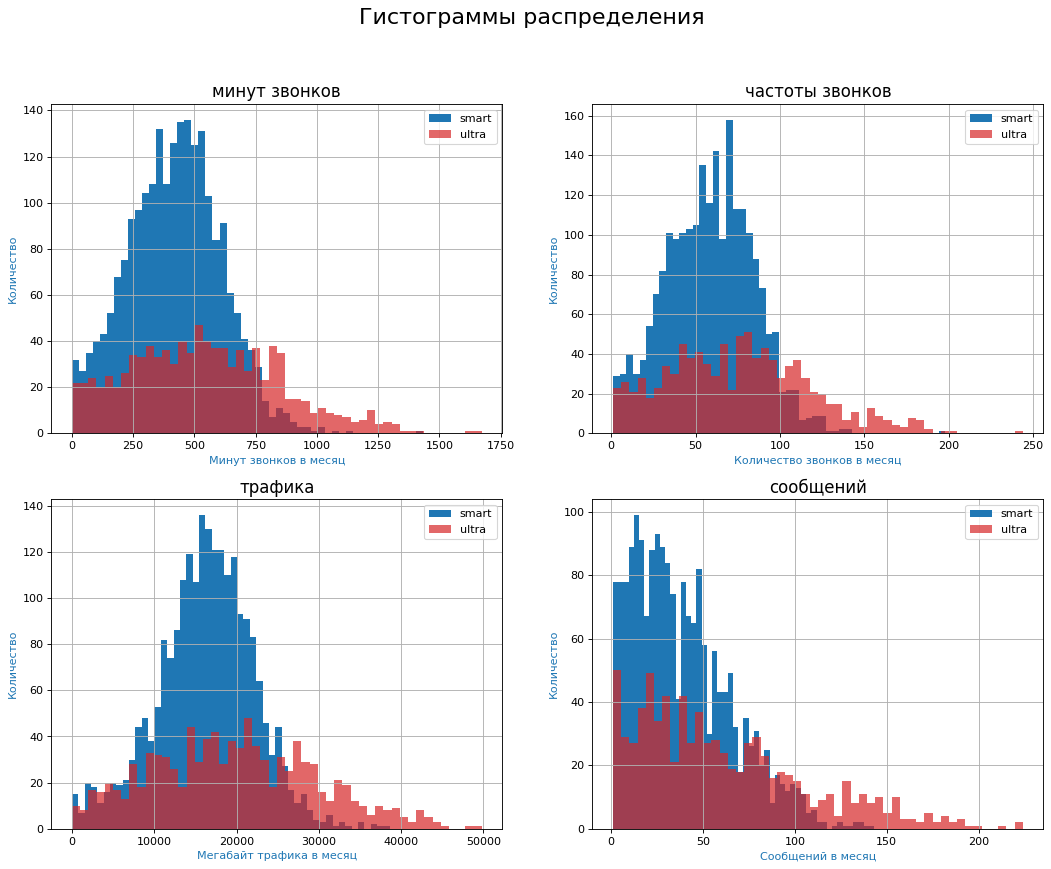

In [42]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(16,12), dpi=80)

x0, y0 = df.loc[df['tariff'] == 'smart', 'duration_sum'], df.loc[df['tariff'] == 'ultra', 'duration_sum']
x1, y1 = df.loc[df['tariff'] == 'smart', 'duration_count'], df.loc[df['tariff'] == 'ultra', 'duration_count']
x2, y2 = df.loc[df['tariff'] == 'smart', 'mb_used_sum'], df.loc[df['tariff'] == 'ultra', 'mb_used_sum']
x3, y3 = df.loc[df['tariff'] == 'smart', 'message_count'], df.loc[df['tariff'] == 'ultra', 'message_count']

#  гистограмма по звонкам без 0
ax0.hist(x0, 50, facecolor='tab:blue', alpha=1, label='smart')
ax0.hist(y0, 50, facecolor='tab:red', alpha=.7, label='ultra')
ax0.set_xlabel('Минут звонков в месяц', fontsize=10, color='tab:blue')
ax0.set_ylabel('Количество', fontsize=10, color='tab:blue')
ax0.set_title('минут звонков', fontsize=15)
ax0.legend()
ax0.grid(True)

#  гистограмма по звонкам с 0
ax1.hist(x1, 50, facecolor='tab:blue', alpha=1, label='smart')
ax1.hist(y1, 50, facecolor='tab:red', alpha=.7, label='ultra')
ax1.set_xlabel('Количество звонков в месяц', fontsize=10, color='tab:blue')
ax1.set_ylabel('Количество', fontsize=10, color='tab:blue')
ax1.set_title('частоты звонков', fontsize=15)
ax1.legend()
ax1.grid(True)

#  гистограмма по интернету
ax2.hist(x2, 50, facecolor='tab:blue', alpha=1, label='smart')
ax2.hist(y2, 50, facecolor='tab:red', alpha=.7, label='ultra')
ax2.set_xlabel('Мегабайт трафика в месяц', fontsize=10, color='tab:blue')
ax2.set_ylabel('Количество', fontsize=10, color='tab:blue')
ax2.set_title('трафика', fontsize=15)
ax2.legend()
ax2.grid(True)

#  гистограмма по сообщениям
ax3.hist(x3, 50, facecolor='tab:blue', alpha=1, label='smart')
ax3.hist(y3, 50, facecolor='tab:red', alpha=.7, label='ultra')
ax3.set_xlabel('Сообщений в месяц', fontsize=10, color='tab:blue')
ax3.set_ylabel('Количество', fontsize=10, color='tab:blue')
ax3.set_title('сообщений', fontsize=15)
ax3.legend()
ax3.grid(True)

fig.suptitle('Гистограммы распределения', fontsize=20)
plt.show()

И графики плотностей распределения:

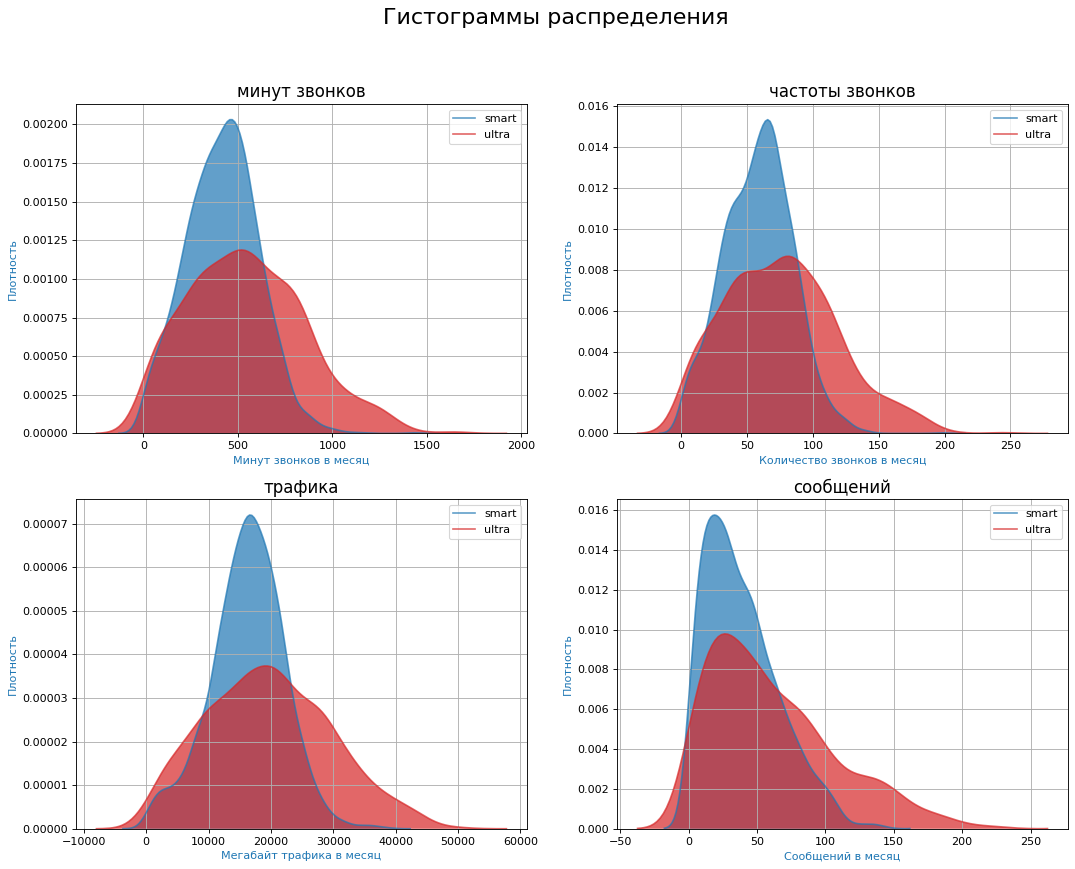

In [43]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(16,12), dpi=80)

#  гистограмма по звонкам без 0
sns.kdeplot(x0, ax=ax0, shade=True, color="tab:blue", label="smart", alpha=.7)
sns.kdeplot(y0, ax=ax0, shade=True, color="tab:red", label="ultra", alpha=.7)
ax0.set_xlabel('Минут звонков в месяц', fontsize=10, color='tab:blue')
ax0.set_ylabel('Плотность', fontsize=10, color='tab:blue')
ax0.set_title('минут звонков', fontsize=15)
ax0.legend()
ax0.grid(True)

#  гистограмма по звонкам с 0
sns.kdeplot(x1, ax=ax1, shade=True, color="tab:blue", label="smart", alpha=.7)
sns.kdeplot(y1, ax=ax1, shade=True, color="tab:red", label="ultra", alpha=.7)
ax1.set_xlabel('Количество звонков в месяц', fontsize=10, color='tab:blue')
ax1.set_ylabel('Плотность', fontsize=10, color='tab:blue')
ax1.set_title('частоты звонков', fontsize=15)
ax1.legend()
ax1.grid(True)

#  гистограмма по интернету
sns.kdeplot(x2, ax=ax2, shade=True, color="tab:blue", label="smart", alpha=.7)
sns.kdeplot(y2, ax=ax2, shade=True, color="tab:red", label="ultra", alpha=.7)
ax2.set_xlabel('Мегабайт трафика в месяц', fontsize=10, color='tab:blue')
ax2.set_ylabel('Плотность', fontsize=10, color='tab:blue')
ax2.set_title('трафика', fontsize=15)
ax2.legend()
ax2.grid(True)

#  гистограмма по сообщениям
sns.kdeplot(x3, ax=ax3, shade=True, color="tab:blue", label="smart", alpha=.7)
sns.kdeplot(y3, ax=ax3, shade=True, color="tab:red", label="ultra", alpha=.7)
ax3.set_xlabel('Сообщений в месяц', fontsize=10, color='tab:blue')
ax3.set_ylabel('Плотность', fontsize=10, color='tab:blue')
ax3.set_title('сообщений', fontsize=15)
ax3.legend()
ax3.grid(True)

fig.suptitle('Гистограммы распределения', fontsize=20)
plt.show()

На графиках наглядно подтвердились наши предположения. Видим, что значения по тарифу *smart* сильнее стремятся к среднему значению, чем значения по тарифу *ultra*.

[к началу шага](#3-2) | [к началу этапа](#3) | [к началу страницы](#top)

<a id="3-3"></a>
### Шаг 3.3 Выводы по третьему этапу

Оценив среднее, дисперсию и стандартное отклонение, а также взглянув на графики распределения и гистограммы мы видим, что по звонкам и трафику распределение напоминает нормальное, а вот по сообщениям &mdash; скорее Пуассоновское. Кроме того, Значения по тарифу smart сильнее стремятся к среднему значению, чем значения по тарифу ultra. Если сравнить средние значения с тарифными лимитами, окажется что значения по тарифу *smart* близки к лимитам, а значения по трафику даже превышают его. Если же мы возьмём тариф *ultra*, то средние значения находятся очень далеко от лимитов. Только среднее значение по трафику составляет порядка двух третей от лимита. Значения по звонкам составляют не больше 20%, а по сообщениям &mdash; 10%.

Эти данные говорят нам о том, что лимиты тарифа *smart* действительно умные, и настроены вполне адекватно. А вот у тарифа *ultra* слишком большие лимиты &mdash; только малая часть пользователей использует его на полную. А вот тем клиентам тарифа *smart*, которые регулярно превышают лимиты, можно предложить перейти на тариф *ultra*.

[к началу шага](#3-3) | [к началу этапа](#3) | [к началу страницы](#top)

<a id="4"></a>
## Этап 4. Проверка гипотез

<a id="4-1"></a>
### Шаг 4.1 «Ультра» и «Смарт»: различается ли средняя выручка?

Теперь проверим гипотезы. Для начала сформулируем нулевую гипотезу &mdash; средняя выручка по тарифам «Ультра» и «Смарт» равна. Соответственно альтернативной гипотезой будет их неравенство.

Для начала посчитаем выручку по каждому клиенту за каждый месяц. Для этого напишем функцию, которая посчитает выручку, затем применим её к датафрейму и сохраним результат в столбец `profit`:

In [44]:
def profit_calc(df):
    #  объявляем переменные
    fee = calls_profit = internet_profit = messages_profit = 0
    fee = df['rub_monthly_fee']  #  заключаем стоимость тарифа в переменную
    
    #  считаем превышение ежемесячных лимитов
    calls = df['duration_sum'] - df['minutes_included']
    internet = (df['mb_used_sum'] - df['mb_per_month_included']) / 1024
    messages = df['message_count'] - df['messages_included']
    
    #  обнуляем отрицательные значения с помощью умножения на False
    calls *= (calls >= 0)
    internet *= (internet >= 0)
    messages *= (messages >= 0)
    
    #  считаем стоимость дополнительных услуг
    calls_profit = calls * df['rub_per_minute']
    internet_profit = np.ceil(internet) * df['rub_per_gb']
    messages_profit = messages * df['rub_per_message']
    
    #  возвращаем затраты пользователя за месяц
    return fee + calls_profit + internet_profit + messages_profit

df_profit = df
df_profit = df_profit.fillna(0)
df_profit['profit'] = profit_calc(df_profit)
df_profit.groupby('tariff')['profit'].mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.


tariff
smart    1294.63930
ultra    2071.06599
Name: profit, dtype: float64

Видим, что средние значения по тарифам отличаются.

Теперь построим графики:

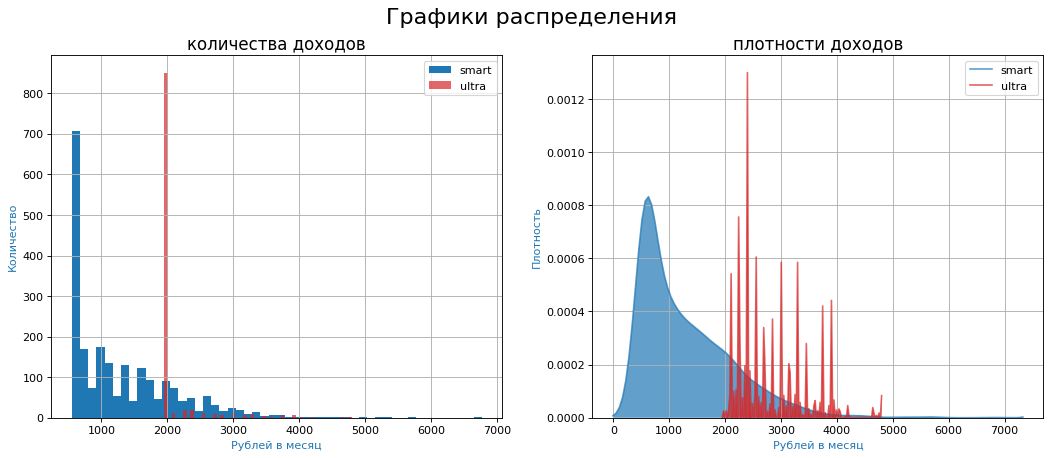

In [45]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16,6), dpi=80)

x0, y0 = df_profit.loc[df_profit['tariff'] == 'smart', 'profit'], df_profit.loc[df_profit['tariff'] == 'ultra', 'profit']

#  гистограмма по звонкам без 0
ax0.hist(x0, 50, facecolor='tab:blue', alpha=1, label='smart')
ax0.hist(y0, 50, facecolor='tab:red', alpha=.7, label='ultra')
ax0.set_xlabel('Рублей в месяц', fontsize=10, color='tab:blue')
ax0.set_ylabel('Количество', fontsize=10, color='tab:blue')
ax0.set_title('количества доходов', fontsize=15)
ax0.legend()
ax0.grid(True)

#  гистограмма по звонкам с 0
sns.kdeplot(x0, ax=ax1, shade=True, color="tab:blue", label="smart", alpha=.7)
sns.kdeplot(y0, ax=ax1, shade=True, color="tab:red", label="ultra", alpha=.7)
ax1.set_xlabel('Рублей в месяц', fontsize=10, color='tab:blue')
ax1.set_ylabel('Плотность', fontsize=10, color='tab:blue')
ax1.set_title('плотности доходов', fontsize=15)
ax1.legend()
ax1.grid(True)

fig.suptitle('Графики распределения', fontsize=20)
plt.show()

Графики получились очень своеобразными, но кажется тоже разными. Но пойдём до конца и проверим гипотезу с помощью сравнения самих совокупностей. Возьмём &#945;=.05:

In [47]:
df_smart = df_profit.loc[df_profit['tariff'] == 'smart', 'profit']
df_ultra = df_profit.loc[df_profit['tariff'] == 'ultra', 'profit']

alpha = .05
e_var = abs((np.var(df_smart) - np.var(df_ultra)) / np.var(df_ultra))
equal = e_var < alpha

results = st.ttest_ind(df_smart, df_ultra, equal_var=e_var)

print('различие выборок: {:.4%}'.format(e_var))
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Гипотеза не подтвердилась: средняя выручка различается")
else:
    print("Гипотеза подтвердилась: средняя выручка не различается")

различие выборок: 369.9336%
p-значение: 2.9776448000521676e-158
Гипотеза не подтвердилась: средняя выручка различается


Как видим, гипотеза не подтвердилась и средняя выручка с клиента в месяц по каждому тарифу действительно различается.

[к началу шага](#4-1) | [к началу этапа](#4) | [к началу страницы](#top)

<a id="4-2"></a>
### Шаг 4.2 Отличается ли средняя выручка пользователей из Москвы от выручки пользователей из других регионов?

Теперь сформулируем вторую гипотезу. Нулевая гипотеза: средняя выручка по пользователям из Москвы равна средней выручке по пользователям из других регионов. Альтернативной гипотезой будет их неравенство.

Теперь возьмём наш датафрейм и заменим все города, кроме Москвы на `Другой`:

In [48]:
df_cities = df_profit
df_cities.loc[df_cities['city'] != 'Москва', 'city'] = 'Другой'
df_cities.groupby('city')['profit'].mean()

city
Другой    1528.316942
Москва    1550.805237
Name: profit, dtype: float64

Как видим, средние значения очень близки.

Теперь посмотрим на графики:

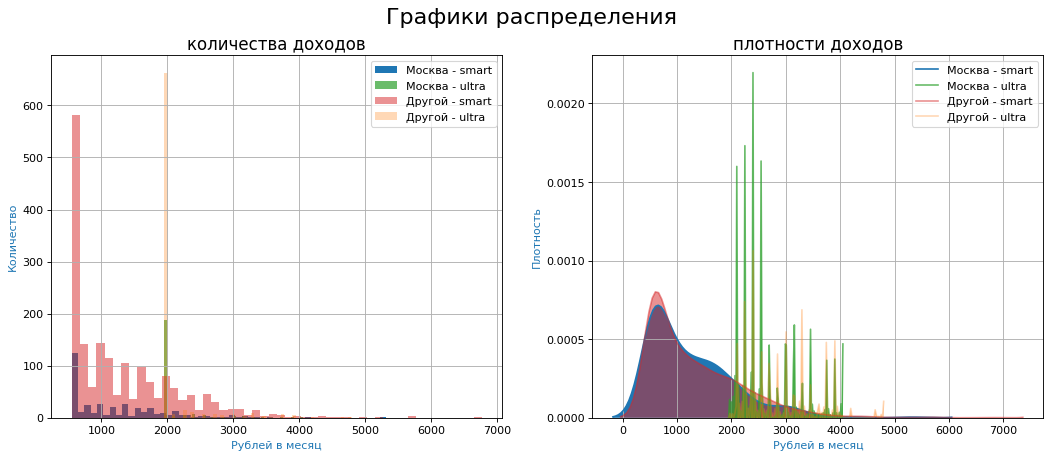

In [49]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16,6), dpi=80)

x0 = df_cities.loc[(df_cities['tariff'] == 'smart') & (df_cities['city'] == 'Москва'), 'profit']
x1 = df_cities.loc[(df_cities['tariff'] == 'ultra') & (df_cities['city'] == 'Москва'), 'profit']
y0 = df_cities.loc[(df_cities['tariff'] == 'smart') & (df_cities['city'] == 'Другой'), 'profit']
y1 = df_cities.loc[(df_cities['tariff'] == 'ultra') & (df_cities['city'] == 'Другой'), 'profit']

#  гистограмма по звонкам без 0
ax0.hist(x0, 50, facecolor='tab:blue', alpha=1, label='Москва - smart')
ax0.hist(x1, 50, facecolor='tab:green', alpha=.7, label='Москва - ultra')
ax0.hist(y0, 50, facecolor='tab:red', alpha=.5, label='Другой - smart')
ax0.hist(y1, 50, facecolor='tab:orange', alpha=.3, label='Другой - ultra')
ax0.set_xlabel('Рублей в месяц', fontsize=10, color='tab:blue')
ax0.set_ylabel('Количество', fontsize=10, color='tab:blue')
ax0.set_title('количества доходов', fontsize=15)
ax0.legend()
ax0.grid(True)

#  гистограмма по звонкам с 0
sns.kdeplot(x0, ax=ax1, shade=True, color="tab:blue", label="Москва - smart", alpha=1)
sns.kdeplot(x1, ax=ax1, shade=True, color="tab:green", label="Москва - ultra", alpha=.7)
sns.kdeplot(y0, ax=ax1, shade=True, color="tab:red", label="Другой - smart", alpha=.5)
sns.kdeplot(y1, ax=ax1, shade=True, color="tab:orange", label="Другой - ultra", alpha=.3)
ax1.set_xlabel('Рублей в месяц', fontsize=10, color='tab:blue')
ax1.set_ylabel('Плотность', fontsize=10, color='tab:blue')
ax1.set_title('плотности доходов', fontsize=15)
ax1.legend()
ax1.grid(True)

fig.suptitle('Графики распределения', fontsize=20)
plt.show()

На графиках видим, что в Москве хоть и меньше пользователей, плотность их распределения почти не отличается от остальной России.

Далее сравним сами совокупности. Возьмём &#945;=.05:

In [50]:
df_moscow = df_cities.loc[df_cities['city'] == 'Москва', 'profit']
df_other = df_cities.loc[df_cities['city'] == 'Другой', 'profit']

alpha = .05
e_var = abs((np.var(df_moscow) - np.var(df_other)) / np.var(df_other))
equal = e_var < alpha

results = st.ttest_ind(df_moscow, df_other, equal_var=e_var)

print('различие выборок: {:.4%}'.format(e_var))
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Гипотеза не подтвердилась: средняя выручка различается")
else:
    print("Гипотеза подтвердилась: средняя выручка не различается")

различие выборок: 13.9004%
p-значение: 0.531666503831252
Гипотеза подтвердилась: средняя выручка не различается


Наши прошлые наблюдения подтвердились &mdash; средняя выручка по Москве и по остальной России отличается незначительно.

[к началу шага](#4-2) | [к началу этапа](#4) | [к началу страницы](#top)

<a id="5"></a>
## Этап 5. Результаты исследования

<a id="5-1"></a>
### Шаг 5.1 Общие выводы

В этом исследовании нас интересовали ответы на следующие вопросы:

- Какой тариф приносит больше денег?
- Пользователи «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.
- Различается ли средняя выручка пользователей тарифов «Ультра» и «Смарт»?
- Различается ли средняя выручка пользователей из Москвы от выручки пользователей из других регионов?

**Общие результаты**

В этом исследовании мы анализировали 500 клиентов компании «Мегалайн» и то, как они пользуются своими тарифами. Большая часть (&ap;70%) пользуется более дешёвым тарифом *smart*. При этом отток клиентов больше именно с более затратного тарифа *ultra* (&ap;10% у *ultra* против &ap;6% у *smart*). Вероятно это связано с тем, что лимиты тарифа *ultra* слишком большие, и большинство пользователей не в состоянии потратить их за месяц, поэтому они смотрят на тарифы с более низкими лимитами, которые наверняка окажутся дешевле.

Мы оценили среднее, дисперсию и стандартное отклонение, графики распределения и гистограммы мы видим, что по звонкам и трафику распределение напоминает нормальное, а вот по сообщениям — скорее Пуассоновское *(Пуассоновское распределение в сообщениях скорее всего говорит нам о том, что этот способ связи всё менее актуален, потому что большинство современных людей общается в мессенджерах)*. Значения по тарифу *smart* сильнее стремятся к среднему значению, чем значения по тарифу *ultra*. Значения по тарифу *smart* близки к лимитам, а значения тарифа ultra находятся очень далеко от лимитов.

Мы сформулировали две нулевые гипотезы: «средняя выручка по тарифам «Ультра» и «Смарт» равна» и «средняя выручка по пользователям из Москвы равна средней выручке по пользователям из других регионов». Первая гипотеза не подтвердилась — выручка по тарифам оказалась разной. В среднем больше денег платят клиенты тарифа *ultra*, что неудивительно. Вторая гипотеза подтвердилась — выручка с клиента по Москве незначительно отличается от выручки в других городах.

На основании этого исследования мы сформулировали рекомендации, которые помогут улучшить бизнес-показатели компании «Мегалайн».

[к началу шага](#5-1) | [к началу этапа](#5) | [к началу страницы](#top)

<a id="5-2"></a>
### Шаг 5.2 Рекомендации

Несмотря на то, что по итогам исследования тариф *ultra* показал б***о***льшую выручку с клиента, этот тариф не является оптимальным по нескольким причинам:
- Лимиты тарифа слишком большие, и для большинства клиентов бесполезны. Это заставляет их задуматься о переходе на более приближённый к их потребностям тариф, который скорее всего окажется ещё и дешевле.
- Отток клиентов с этого тарифа почти в два раза выше, что вероятно связано с излишними лимитами и высокой ценой, но необязательно ограничивается этим. В рамках исследования этого не видно, но возможно с тарифом есть и другие проблемы.
- Затраты на поддержку тарифа вероятно выше, поэтому высокая выручка ещё не гарантирует прибыль.

В связи с этим предлагается два варианта:
1. Изменить лимиты тарифа *ultra* и приблизить их к текущим средним значениям по звонкам, трафику и сообщениям. Соответственно снизить цену на тариф.
2. Не изменять лимиты тарифа, а оставить его в этой ценовой категории, добавить премиальное обслуживание.  Добавить тариф, который займёт нишу между *smart* и *ultra* (средний сегмент): подобрать его лимиты по текущим средним значениям тарифа *ultra*, установить среднюю стоимость обслуживания.

Что касается маркетинговых бюджетов, то для тарифа *ultra* необходимо скорректировать рекламную кампанию, судя по всему ЦА о нём недостаточно осведомлена. Для тарифа *smart* ситцация сложилась более благоприятная ситуация, большая часть абонентов вписывается в рамки тарифа. Поэтому рекомендуется сменить стратегию в отношении тарифа *ultra*, соответственно большую часть средств направить на продвижение этого тарифа.

Кроме того, рекомендуется отследить природу большого количества пропущенных звонков: возможно номера клиентов используются для спам-звонков и мошеннических схем. Также можно предложить адресатам этих звонков дополнительные услуги по фильтрации звонков, если они окажутся клиентами компании.

[к началу шага](#5-2) | [к началу этапа](#5) | [к началу страницы](#top)